In [216]:
import csv
from datetime import datetime

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

# First Model
This firt model has no feature preprocessed appart from the scaling of each feature like a bell curve centered in 0.

In [217]:
# Load the data
data = pd.read_csv('All_Data.csv')
data = data.drop(columns=['Datetime'])
data = data.dropna()
data = data[180:].reset_index()

In [218]:
# Separate features and target variable
X = data.drop(columns=['nb_persons_SH'])
y = data['nb_persons_SH']

In [219]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
Xcnn = X.reshape((X.shape[0], X.shape[1], 1))

In [220]:
# Prepare the category from the classification methods
y = to_categorical(y, num_classes=int(y.max()+1))

In [221]:
split_index = int(len(X) * 1)
X_validation = X[-split_index:]
y_validation = y[-split_index:]

In [222]:
# Load the model from the keras file
loaded_model = tf.keras.models.load_model('Models/Cla/1DCNN.keras')

c:\Users\Charles\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [223]:
# # Evaluate the loaded model to ensure it's working correctly
# loaded_loss, loaded_accuracy = loaded_model.evaluate(X_validation, y_validation)
loaded_loss, loaded_accuracy = loaded_model.evaluate(X_validation, y_validation)
print(f'Loaded model validation accuracy: {loaded_accuracy:.4f}')

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5905 - loss: 7.7720   
Loaded model validation accuracy: 0.5807


In [224]:
y_pred_first1DCNN = loaded_model.predict(X_validation)
y_pred_first1DCNN_cat = np.argmax(y_pred_first1DCNN, axis=1)
y_validation_cat = np.argmax(y_validation, axis=1)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


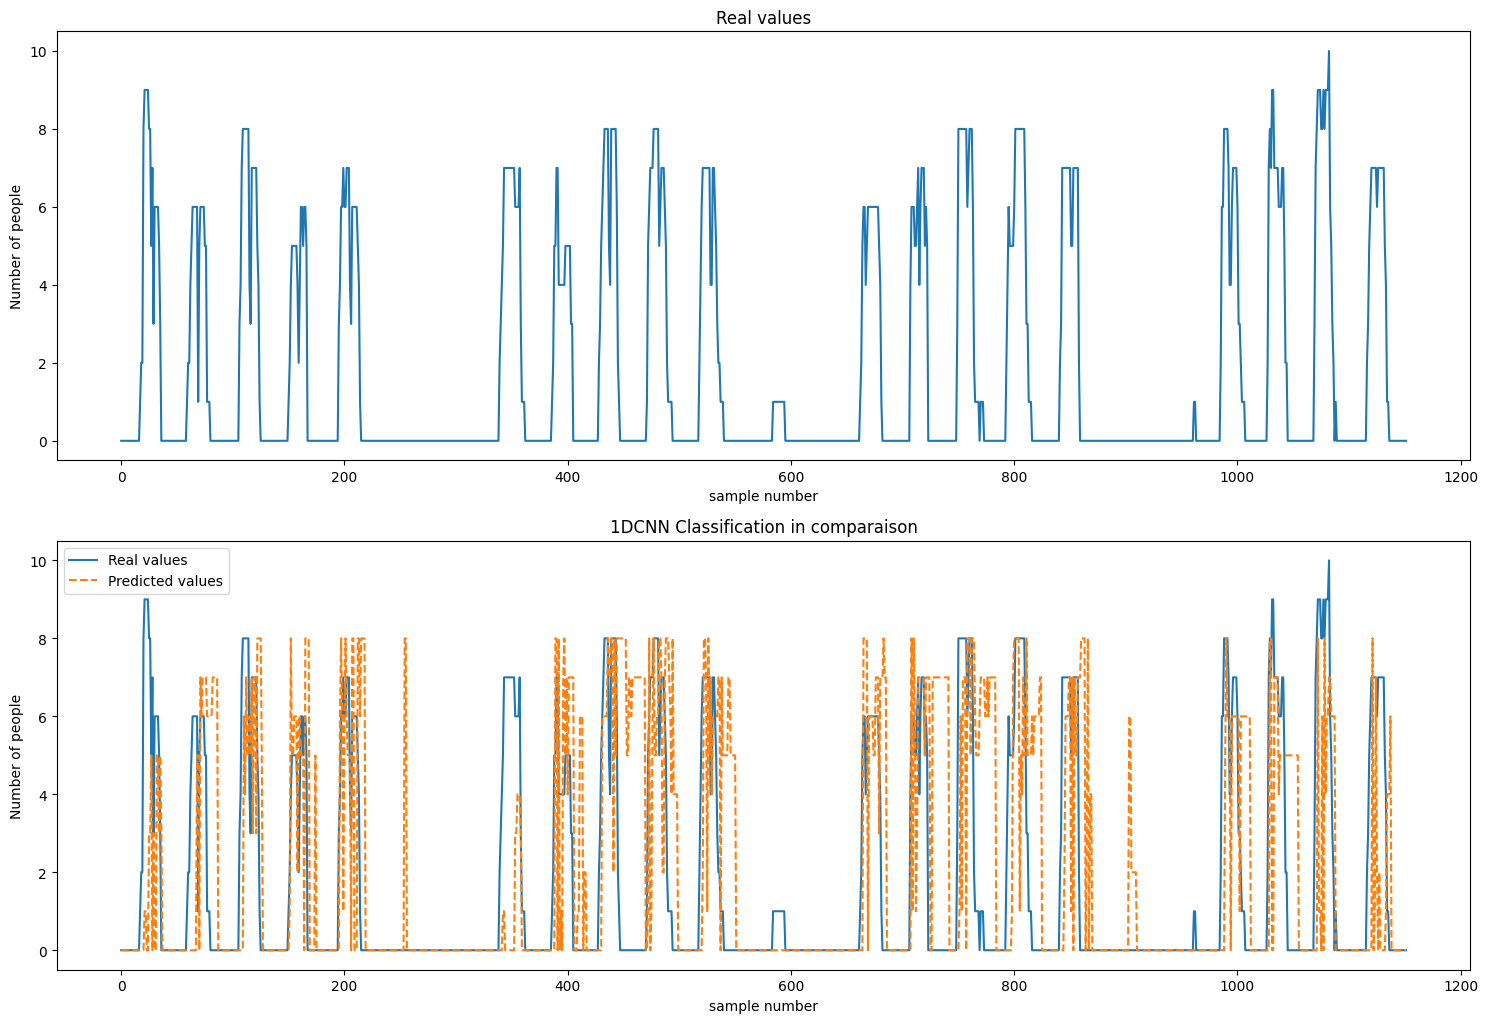

In [225]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(y_validation_cat)
plt.title('Real values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(3, 1, 2)
sns.lineplot(data=y_validation_cat, label='Real values')
sns.lineplot(data=y_pred_first1DCNN_cat, label='Predicted values',linestyle='--')
plt.title('1DCNN Classification in comparaison')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

# Creating more complex networks

## Odl

In [226]:
Odlmodel = tf.keras.models.load_model('Models/Cla/1DCNN_Odlmodel.keras')

In [227]:
# # Evaluate the loaded model
loaded_loss, loaded_accuracy = Odlmodel.evaluate(X_validation, y_validation)
print(f'Loaded model validation accuracy: {loaded_accuracy:.4f}')

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5804 - loss: 9.0625   
Loaded model validation accuracy: 0.5825


In [228]:
y_pred_Odlmodel = Odlmodel.predict(X_validation)
y_pred_Odlmodel_cat = np.argmax(y_pred_Odlmodel, axis=1)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


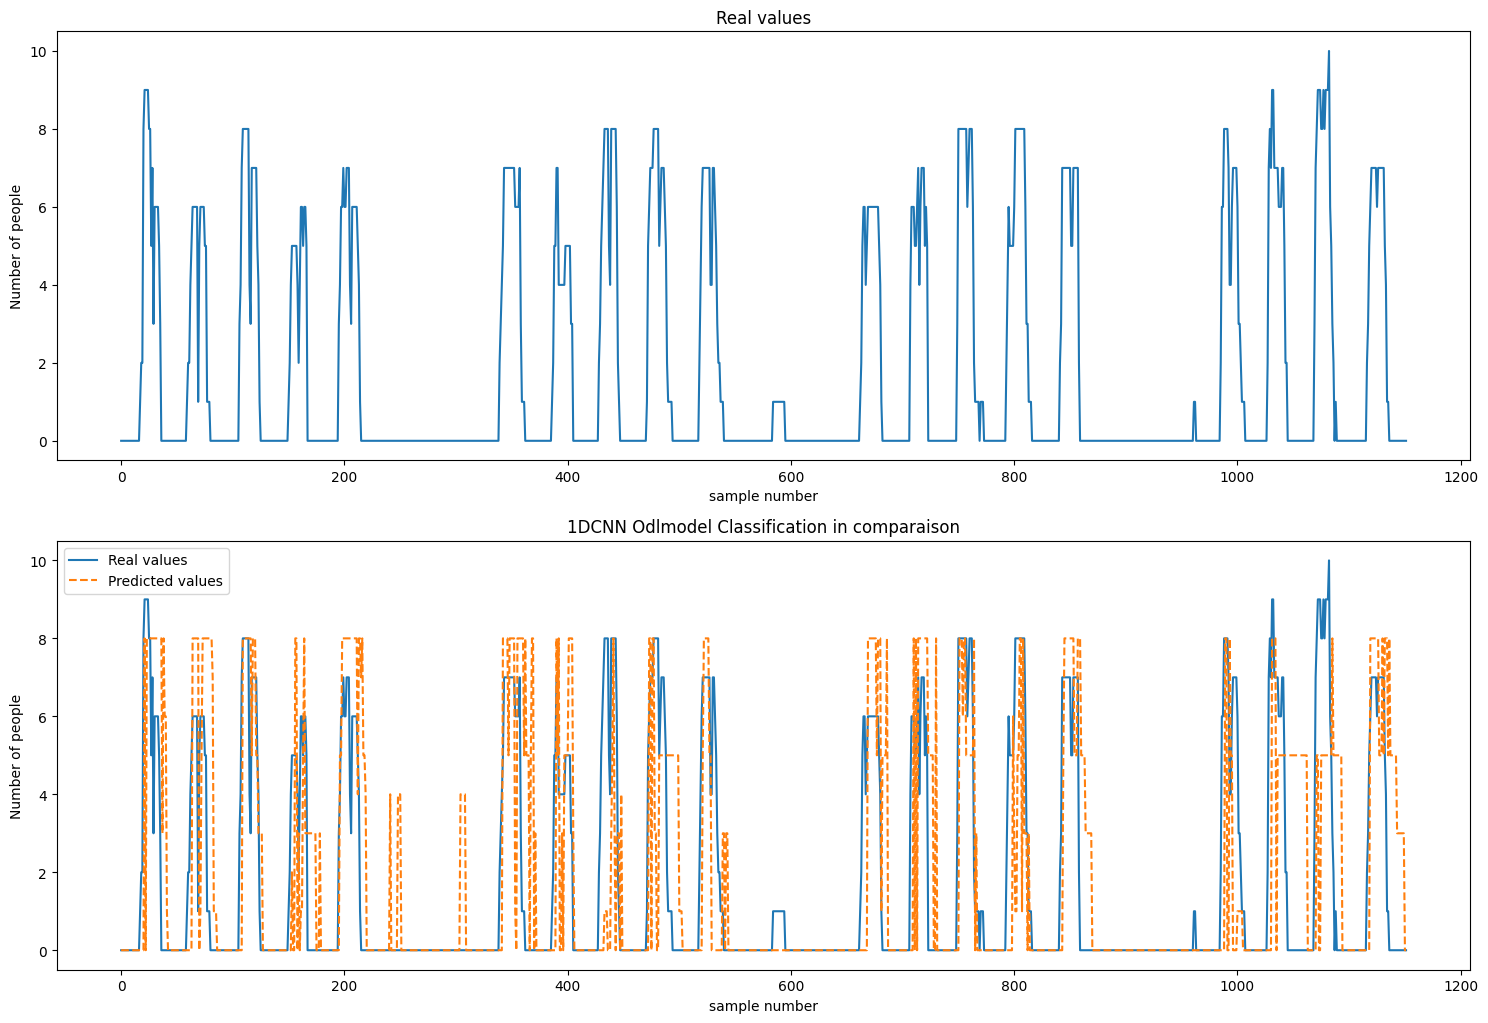

In [229]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(y_validation_cat)
plt.title('Real values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(3, 1, 2)
sns.lineplot(data=y_validation_cat, label='Real values')
sns.lineplot(data=y_pred_Odlmodel_cat, label='Predicted values',linestyle='--')
plt.title('1DCNN Odlmodel Classification in comparaison')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

## New

### Added new features
Created the gradient on the previous data and used simple imputer to complete the data

In [230]:
newdata = pd.read_csv('Organized_Data.csv')

# Drop the 'Datetime' column as it's not needed for the prediction
newdata = newdata.drop(columns=['Datetime'])

# Handle missing values by dropping them
newdata = newdata.dropna()

newdata= newdata[360:].reset_index(drop=True)

X = newdata.drop(columns=['nb_persons_SH'])
y = newdata['nb_persons_SH']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X.reshape((X.shape[0], X.shape[1], 1))

y = to_categorical(y, num_classes=int(y.max()+1))

split_index = int(len(X) * 1)
X_validation = X[-split_index:]
y_validation = y[-split_index:]

In [231]:
Newmodel = tf.keras.models.load_model('Models/Cla/1DCNN_Newmodel.keras')

In [232]:
# # Evaluate the model
loaded_loss, loaded_accuracy = Newmodel.evaluate(X_validation, y_validation)
print(f'Loaded model validation accuracy: {loaded_accuracy:.4f}')

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9154 - loss: 0.4259 
Loaded model validation accuracy: 0.9138


In [233]:
y_pred_Newmodel = Newmodel.predict(X_validation)
y_pred_Newmodel_cat = np.argmax(y_pred_Newmodel, axis=1)
y_validation_cat = np.argmax(y_validation, axis=1)

accuracy = accuracy_score(y_validation_cat, y_pred_Newmodel_cat)
f1 = f1_score(y_validation_cat, y_pred_Newmodel_cat, average='macro')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9138155045474231
F1 Score: 0.8084285328767468


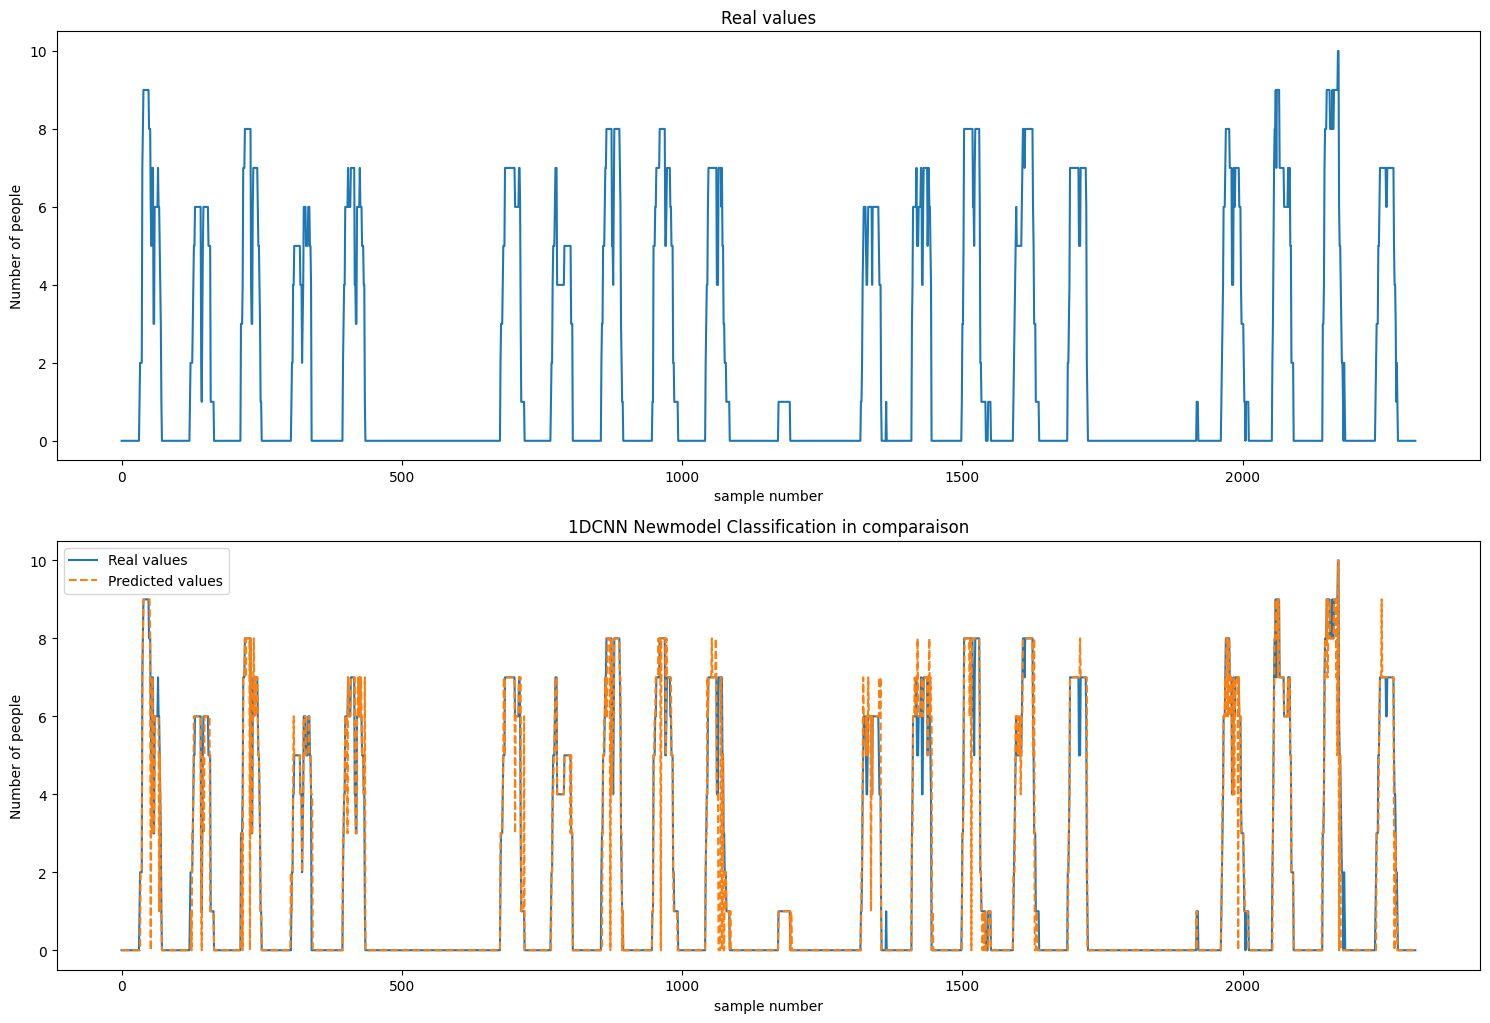

In [234]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(y_validation_cat)
plt.title('Real values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(3, 1, 2)
sns.lineplot(data=y_validation_cat, label='Real values')
sns.lineplot(data=y_pred_Newmodel_cat, label='Predicted values',linestyle='--')
plt.title('1DCNN Newmodel Classification in comparaison')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

# Trying to use the regression models

Basic regression model, same input as the classification models

In [235]:
CNNregModel = tf.keras.models.load_model('Models/Reg/1DCNN_reg_model_1.keras')

In [236]:
# # Evaluate the model
loaded_loss  = CNNregModel.evaluate(X_validation, y_validation)
print(f'Loaded model loss: {loaded_loss:.4f}')

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.3248
Loaded model loss: 10.3384


In [237]:
# Predict and compare with actual values
CNNregModel_predictions = CNNregModel.predict(X_validation)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [238]:
def regression_accuracy(y_true, y_pred, margin):
    correct = np.sum(np.abs(y_true - y_pred) <= margin)
    total = len(y_true)
    accuracy = correct / total
    return accuracy * 10

margin = 1.0
accuracy = regression_accuracy(y_validation, CNNregModel_predictions, margin)
print(f'Regression Accuracy within ±{margin}: {accuracy:.2f}%')

Regression Accuracy within ±1.0: 75.60%


In [239]:
y_reg_validation = newdata['nb_persons_SH']
y_reg_validation = y_reg_validation[-923:]

In [241]:
# # Calculate additional metrics
# mae = mean_absolute_error(y_reg_validation, CNNregModel_predictions)
# mse = mean_squared_error(y_reg_validation, CNNregModel_predictions)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_reg_validation, CNNregModel_predictions)

# print(f'Mean Absolute Error (MAE): {mae}')
# print(f'Mean Squared Error (MSE): {mse}')
# print(f'Root Mean Squared Error (RMSE): {rmse}')
# print(f'R-squared (R2): {r2}')

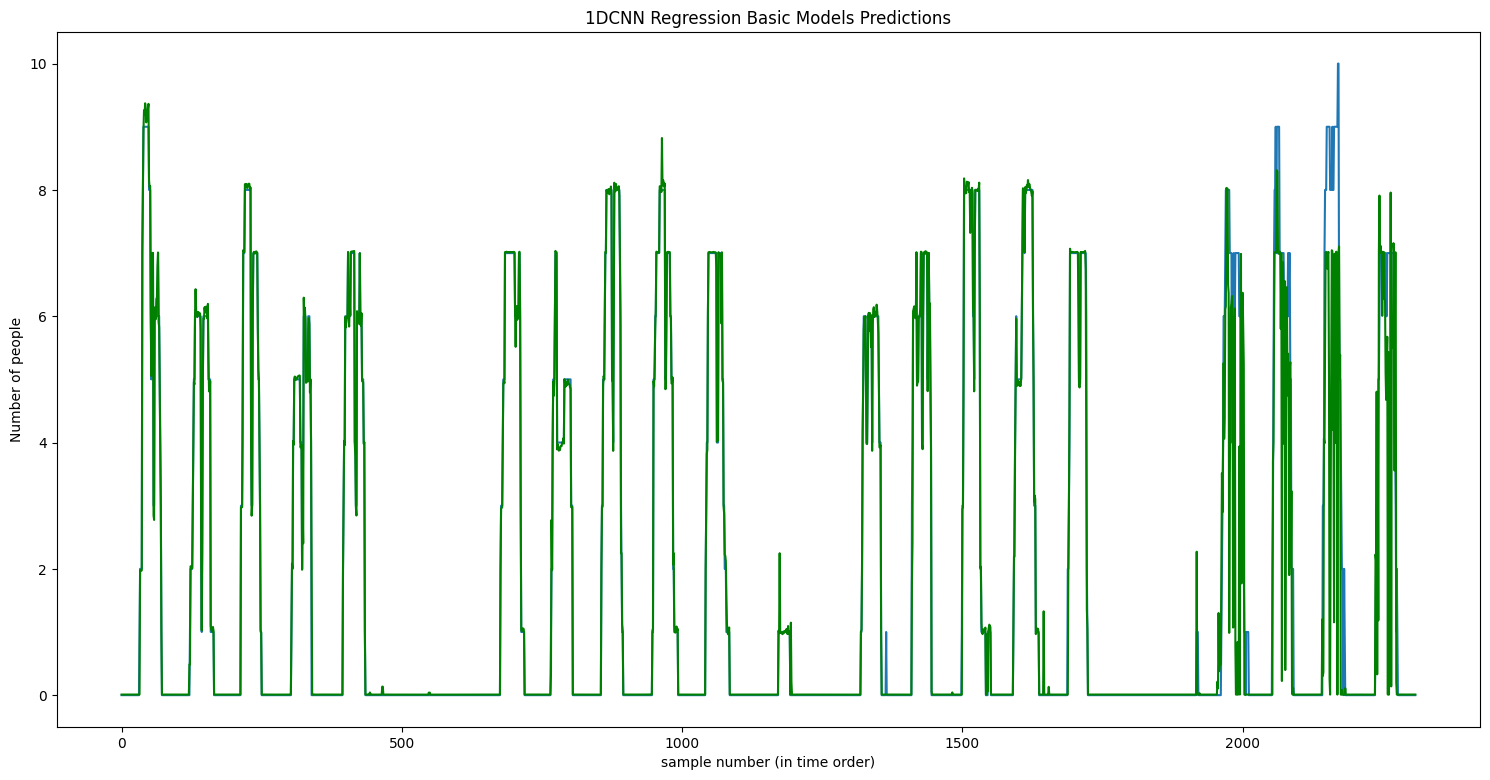

In [242]:
#plot regression 1:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(y_validation_cat,label='Real values')
plt.plot(CNNregModel_predictions,color='g',label='Predicted values')
plt.title('1DCNN Regression Basic Models Predictions')
plt.xlabel('sample number (in time order)')
plt.ylabel('Number of people')

plt.tight_layout()
plt.show()

As we can see from this results, the basic CNN regression models obtain a 82% explain of the data variance

CNN with a sequence of data, no floating window 

In [243]:
CNNregModel_seq_no = tf.keras.models.load_model('Models/Reg/1DCNN_reg_seq_no_floating_windows.keras')

In [244]:
# Load the data
seq_data = pd.read_csv('Organized_Data.csv', parse_dates=['Datetime'])
seq_data.set_index('Datetime', inplace=True)

seq_data = seq_data[180:]
seq_data = seq_data.dropna().reset_index()
seq_data.set_index('Datetime', inplace=True)

# Extract features and labels
X = seq_data.drop(columns=['nb_persons_SH'])
y = seq_data['nb_persons_SH']

# Normalisation
X_z_score = (X - X.mean()) / X.std()
# Convert the dataframe to a NumPy array
array = X_z_score.values
# Reshape X_seq to (number of samples, sequence length, 1) for Conv1D
X_res = array.reshape((array.shape[0], array.shape[1], 1))

split_index = int(len(X) * 0.4)
X_train, X_valid = X_res[split_index:], X_res[-split_index:]
y_train, y_valid = y[split_index:], y[-split_index:]

In [245]:
sequence_length = 10

# Calculate number of sequences we can create
num_sequences_train = X_train.shape[0] // sequence_length
num_sequences_valid = X_valid.shape[0] // sequence_length

# Truncate data to fit the sequences
X_train_truncated = X_train[:num_sequences_train * sequence_length]
X_valid_truncated = X_valid[:num_sequences_valid * sequence_length]
y_train_truncated = y_train[:num_sequences_train * sequence_length]
y_valid_truncated = y_valid[:num_sequences_valid * sequence_length]

# Reshape the data
X_train_reshaped = X_train_truncated.reshape((num_sequences_train, sequence_length, X_train.shape[1]))
X_valid_reshaped = X_valid_truncated.reshape((num_sequences_valid, sequence_length, X_valid.shape[1]))

# Convert y_train_truncated and y_valid_truncated to NumPy arrays and reshape
y_train_reshaped = np.array(y_train_truncated).reshape((num_sequences_train, sequence_length))
y_valid_reshaped = np.array(y_valid_truncated).reshape((num_sequences_valid, sequence_length))

In [246]:
# Evaluate the model
loss = CNNregModel_seq_no.evaluate(X_valid_reshaped, y_valid_reshaped)
print(f'Test Loss (mae): {loss}')

# Predict and compare with actual values
CNNregModel_seq_no_predictions = CNNregModel_seq_no.predict( X_valid_reshaped)

mse = mean_squared_error( y_valid_reshaped[:, 0], CNNregModel_seq_no_predictions)
rmse = np.sqrt(mse)
r2 = r2_score( y_valid_reshaped[:, 0], CNNregModel_seq_no_predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6285  
Test Loss (mae): 2.8879520893096924
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Mean Squared Error (MSE): 2.6742455763321575
Root Mean Squared Error (RMSE): 1.635312073071118
R-squared (R2): 0.7230041218959653


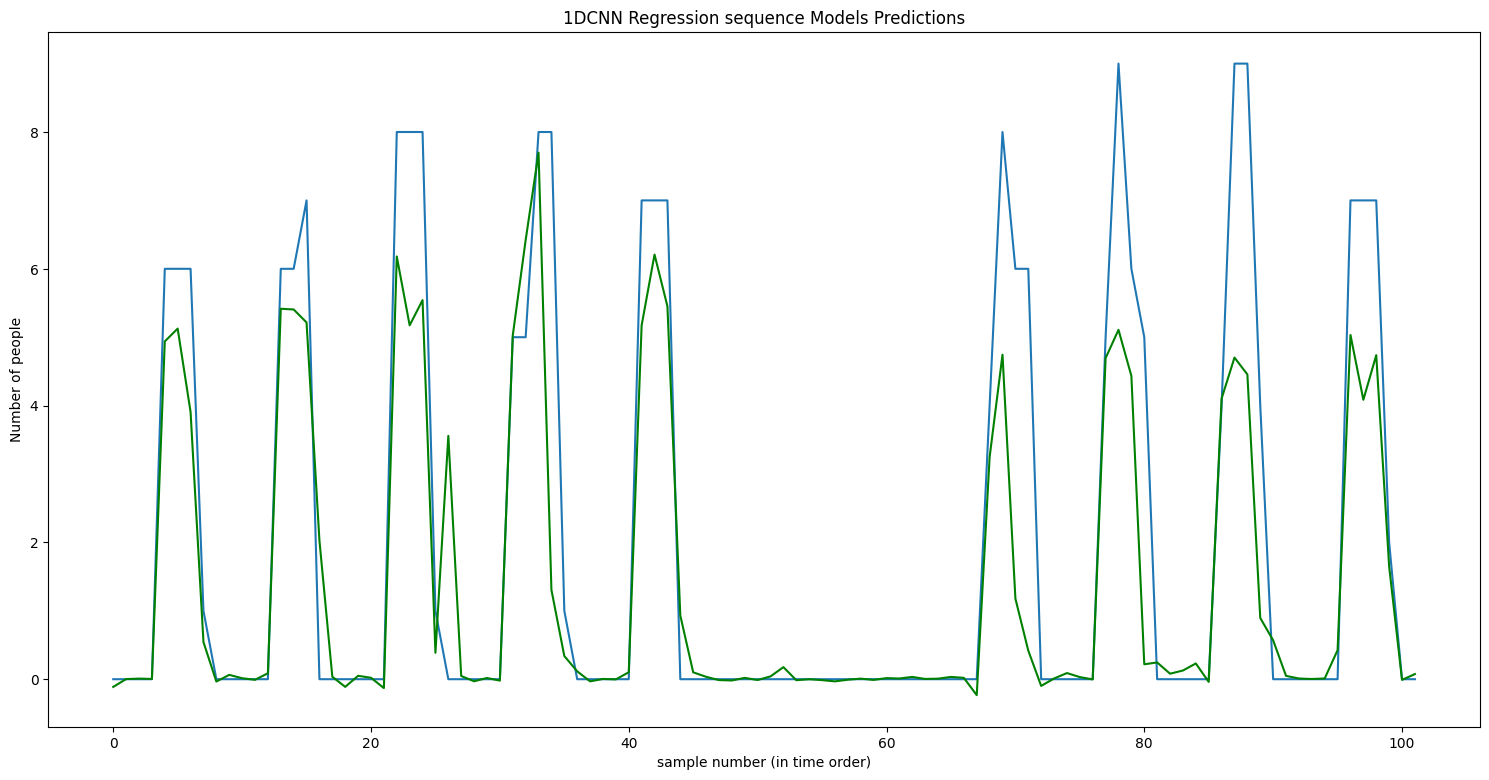

In [247]:
#plot regression 1:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(y_valid_reshaped[:, 0],label='Real values')
plt.plot(CNNregModel_seq_no_predictions,color='g',label='Predicted values')
plt.title('1DCNN Regression sequence Models Predictions')
plt.xlabel('sample number (in time order)')
plt.ylabel('Number of people')

plt.tight_layout()
plt.show()

This figure is showing the results packed in 10 lenght size, this is why the comparaison to the other is under optimal.

CNN with a sequence of data, with a floating window 

In [248]:
CNNregModel_seq_float = tf.keras.models.load_model('Models/Reg/1DCNN_reg_seq_floating_windows.keras')

c:\Users\Charles\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 50 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [249]:
# Load the data
seq_data_float = pd.read_csv('Organized_Data.csv', parse_dates=['Datetime'])
seq_data_float.set_index('Datetime', inplace=True)

seq_data_float = seq_data_float[180:]
seq_data_float = seq_data_float.dropna().reset_index()
seq_data_float.set_index('Datetime', inplace=True)

# Extract features and labels
X = seq_data_float.drop(columns=['nb_persons_SH'])
y = seq_data_float['nb_persons_SH']

# Normalisation
X_z_score = (X - X.mean()) / X.std()
# Convert the dataframe to a NumPy array
array = X_z_score.values
# Reshape X_seq to (number of samples, sequence length, 1) for Conv1D
X_res = array.reshape((array.shape[0], array.shape[1], 1))

split_index = int(len(X) * 0.4)
X_train, X_valid = X_res[split_index:], X_res[-split_index:]
y_train, y_valid = y[split_index:], y[-split_index:]

In [250]:
sequence_length = 10

# Calculate number of sequences we can create
num_sequences_valid = X_valid.shape[0] // sequence_length

# Truncate data to fit the sequences
X_valid_truncated = X_valid[:num_sequences_valid * sequence_length]
y_valid_truncated = y_valid[:num_sequences_valid * sequence_length]

# Reshape the data
X_valid_reshaped = X_valid_truncated.reshape((num_sequences_valid, sequence_length, X_valid.shape[1]))

# Convert y_train_truncated and y_valid_truncated to NumPy arrays and reshape
y_valid_reshaped = np.array(y_valid_truncated).reshape((num_sequences_valid, sequence_length))

In [251]:
# Evaluate the model
loss = CNNregModel_seq_float.evaluate(X_valid_reshaped, y_valid_reshaped)
print(f'Test Loss (mae): {loss}')

# Predict and compare with actual values
CNNregModel_seq_float_predictions = CNNregModel_seq_float.predict( X_valid_reshaped)

mse = mean_squared_error( y_valid_reshaped[:, 0], CNNregModel_seq_float_predictions)
rmse = np.sqrt(mse)
r2 = r2_score( y_valid_reshaped[:, 0], CNNregModel_seq_float_predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.8153  
Test Loss (mae): 13.384041786193848
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Mean Squared Error (MSE): 13.741076169336166
Root Mean Squared Error (RMSE): 3.706895759167793
R-squared (R2): -0.4232879333543078


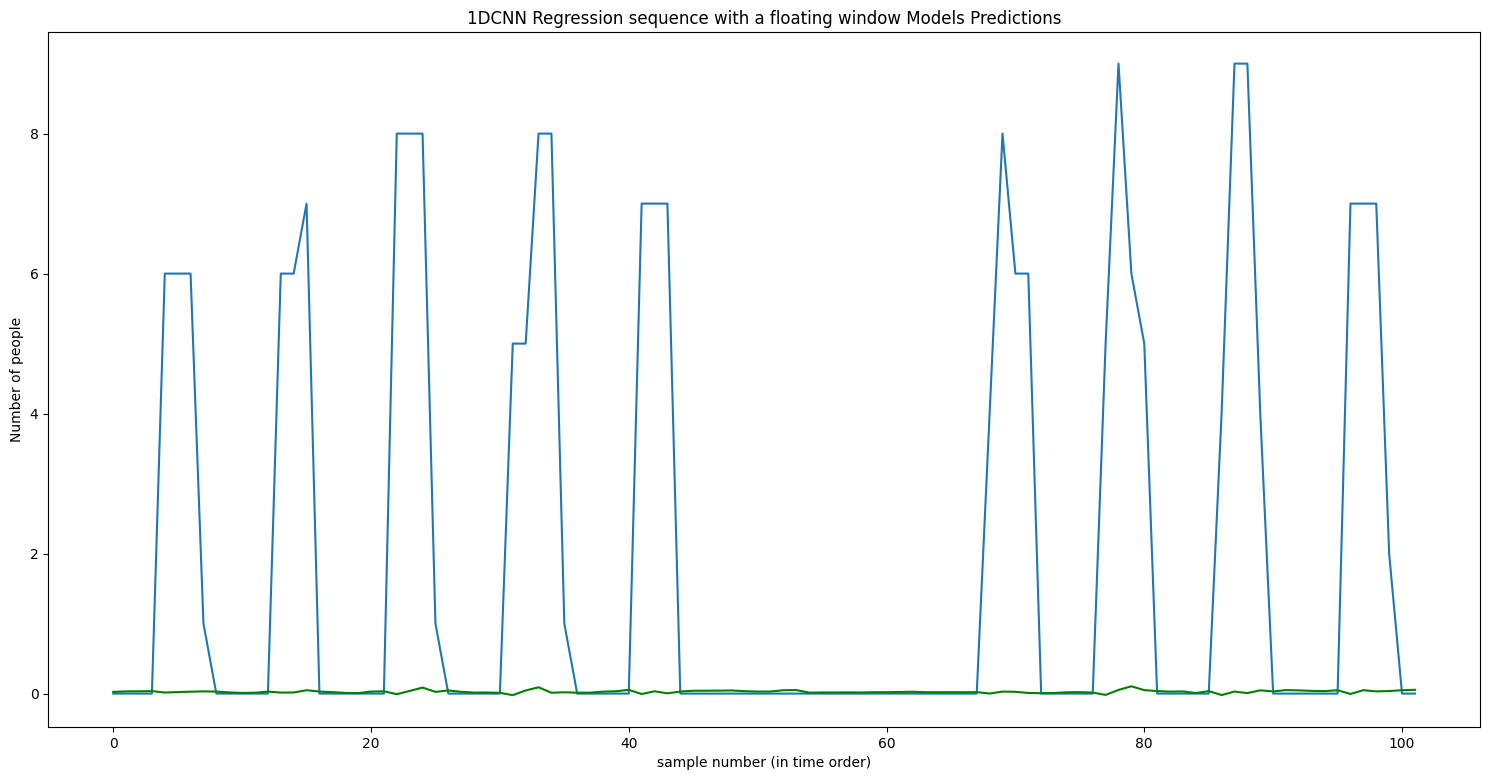

In [252]:
#plot regression 2:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(y_valid_reshaped[:, 0],label='Real values')
plt.plot(CNNregModel_seq_float_predictions,color='g',label='Predicted values')
plt.title('1DCNN Regression sequence with a floating window Models Predictions')
plt.xlabel('sample number (in time order)')
plt.ylabel('Number of people')

plt.tight_layout()
plt.show()

# LSTM

In [253]:
# Load the data
LSTMdata = pd.read_csv('Organized_Data.csv', parse_dates=['Datetime'])
LSTMdata.set_index('Datetime', inplace=True)
LSTMdata = LSTMdata.dropna()
LSTMdata = LSTMdata[360:]

# Extract features and labels
X = LSTMdata.drop(columns=['nb_persons_SH'])
y = LSTMdata['nb_persons_SH']

split_index = int(len(X) * 0.4)
X_train, X_valid = X_res[split_index:], X_res[-split_index:]
y_train, y_valid = y[split_index:], y[-split_index:]

In [254]:
# Define sequence length
sequence_length = 10

# Normalize/Standardize data
X_valid = (X_valid - np.mean(X_valid, axis=0)) / np.std(X_valid, axis=0)

# Verify unique class values in y_train and y_valid
unique_classes = np.unique(np.concatenate([y_train, y_valid]))
num_classes = len(unique_classes)

# Function to create overlapping sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

# Create sequences
X_valid_sequences = create_sequences(X_valid, sequence_length)

# Create corresponding target values (using the last value in each sequence)
y_valid_sequences = y_valid[sequence_length - 1:]

# Convert target values to categorical for multiclass classification
y_valid_sequences_cat = to_categorical(y_valid_sequences, num_classes=num_classes)

LSTM Regression model

In [255]:
LSTM_reg = tf.keras.models.load_model('Models/Reg/LSTM_reg_model_1.keras')

In [256]:
# Evaluate the model
loss = LSTM_reg.evaluate(X_valid_sequences, y_valid_sequences)
print(f'Test Loss: {loss}')

# Predict and compare with actual values
LSTM_predictions = LSTM_reg.predict(X_valid_sequences)

mae = mean_absolute_error(y_valid_sequences, LSTM_predictions)
mse = mean_squared_error(y_valid_sequences, LSTM_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid_sequences, LSTM_predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

c:\Users\Charles\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5998 - loss: nan  
Test Loss: [nan, 0.6356673836708069]
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Mean Absolute Error (MAE): 2.0678336980306344
Mean Squared Error (MSE): 13.945295404814004
Root Mean Squared Error (RMSE): 3.7343400226564807
R-squared (R2): -0.44221505410421513


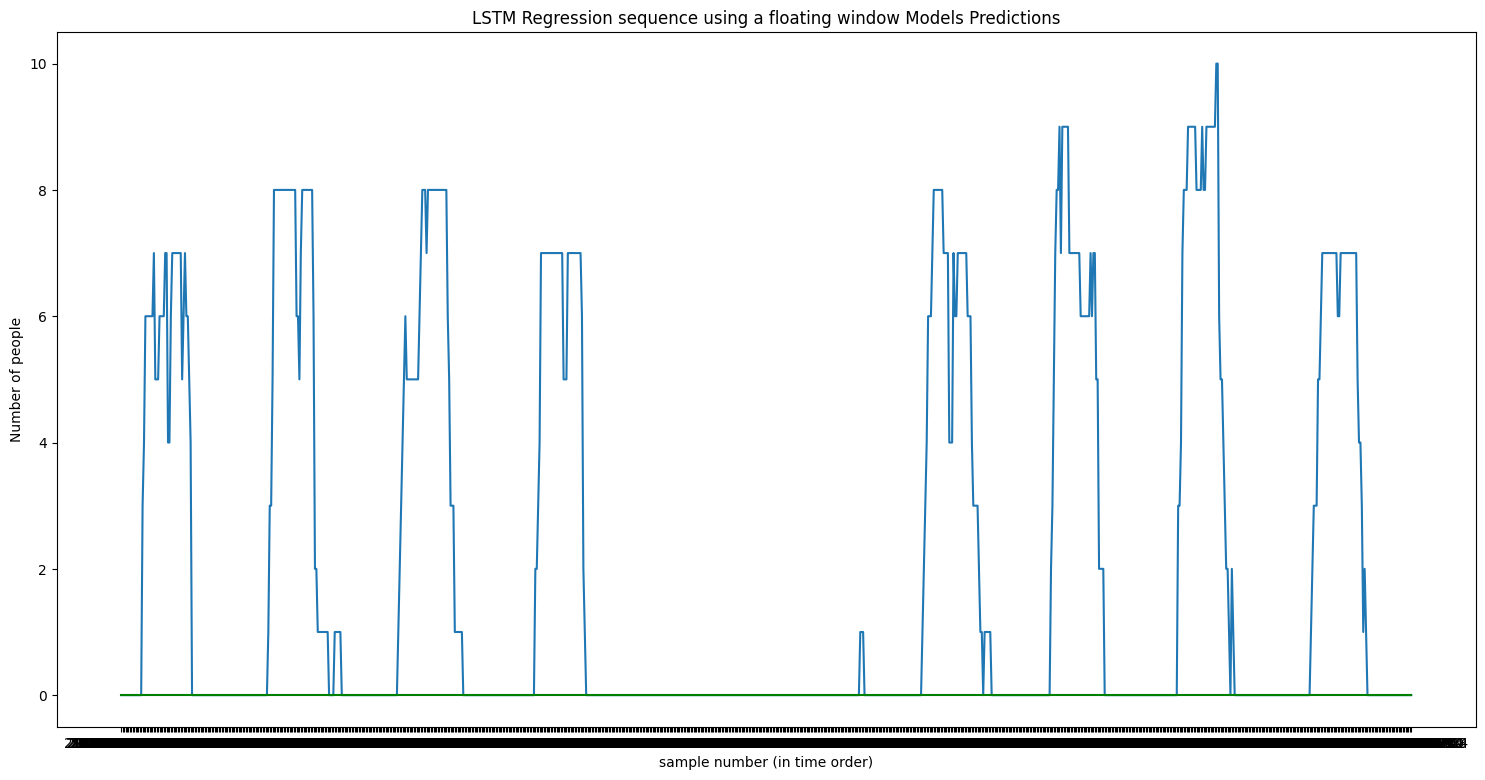

In [257]:
#plot regression 2:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(y_valid_sequences,label='Real values')
plt.plot(LSTM_predictions,color='g',label='Predicted values')
plt.title('LSTM Regression sequence using a floating window Models Predictions')
plt.xlabel('sample number (in time order)')
plt.ylabel('Number of people')

plt.tight_layout()
plt.show()

I had a lot more issues working with the regression methods with flaoting windows inputs

LSTM classification methods

In [258]:
LSTM_clas = tf.keras.models.load_model('Models/Reg/LSTM_cla_model_1.keras')

c:\Users\Charles\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 46 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [259]:
loss, accuracy = LSTM_clas.evaluate(X_valid_sequences, y_valid_sequences_cat)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


LSTM_clas_predictions = LSTM_clas.predict(X_valid_sequences)
LSTM_predicted_classes = np.argmax(LSTM_clas_predictions, axis=1)
true_classes = np.argmax(y_valid_sequences_cat, axis=1)


accuracy = accuracy_score(true_classes, LSTM_predicted_classes)
f1 = f1_score(true_classes, LSTM_predicted_classes, average='macro')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0731 - loss: 2.4235 
Test Loss: 2.4325578212738037
Test Accuracy: 0.04485776647925377
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Accuracy: 0.044857768052516414
F1 Score: 0.019272569192870598


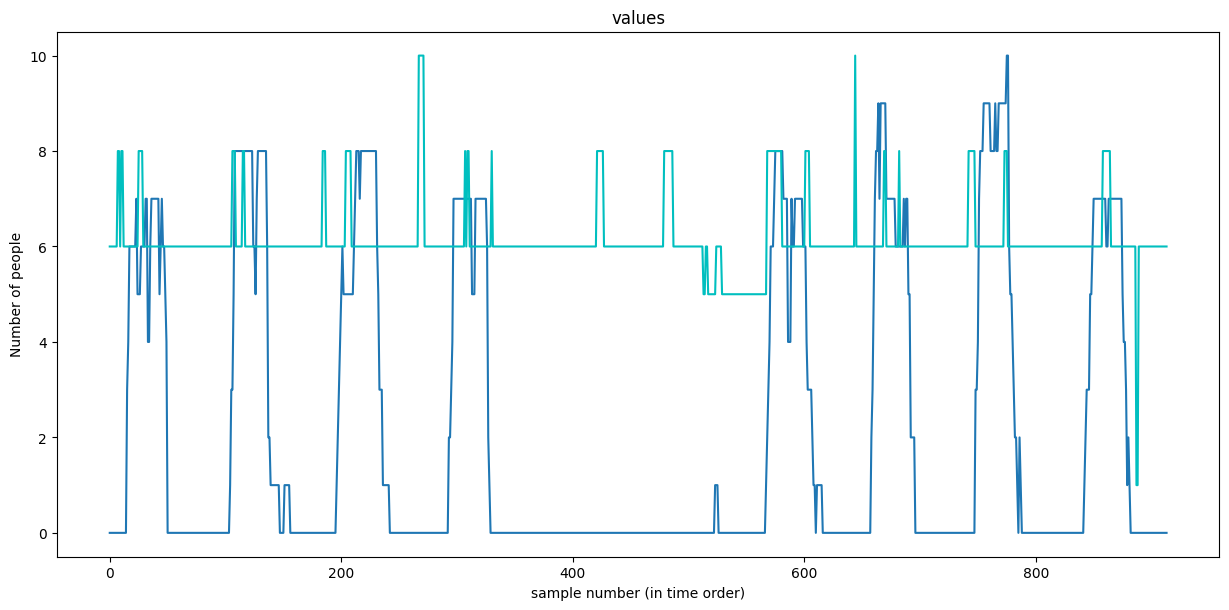

In [260]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(true_classes)
plt.plot(LSTM_predicted_classes,color='c')
plt.title('values')
plt.xlabel('sample number (in time order)')
plt.ylabel('Number of people')
"real values"
"predicted values"
plt.show()

As shows by all the used plots and predictions, on a small scale the best classification model is the NEWmodel, and the best regression model is the basic regression. Both of them are 1DCNN networks. Further on the 1DCNN, the basic iterations are much more easier to implement and require less amount of memory.

In [261]:
# Regression models
## LSTM
print("LSTM Regression Model summary")
LSTM_reg.summary()
## 1DCNN with gradient data
print("CNN basic Regression Model summary")
CNNregModel.summary()
print("CNN sequence Regression Model summary")
CNNregModel_seq_no.summary()
print("CNN floating sequence Regression Model summary")
CNNregModel_seq_float.summary()

# Classification models
## LSTM
print("LSTM Classification Model summary")
LSTM_clas.summary()
## 1DCNN
### Raw data
print("First 1DCNN Classification Model summary")
loaded_model.summary()
print("1DCNN Classification Model summary")
Odlmodel.summary()
### with gradient data
print("First with gradient data 1DCNN Classification Model summary")
Newmodel.summary()


LSTM Regression Model summary


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_7 (Bidirectional) │ (None, 10, 128)        │        39,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 34)             │         2,210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 971,299 (3.71 MB)

 Trainable params: 323,595 (1.23 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 647,192 (2.47 MB)

CNN basic Regression Model summary


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 11, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 11, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 4, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 4, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 1, 256)         │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 579,781 (2.21 MB)

 Trainable params: 192,961 (753.75 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 385,924 (1.47 MB)

CNN sequence Regression Model summary


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 10, 64)         │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 10, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 5, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 5, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 2, 256)         │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 2, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,613 (2.98 MB)

 Trainable params: 259,905 (1015.25 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 519,812 (1.98 MB)

CNN floating sequence Regression Model summary


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_24 (Conv1D)              │ (None, 10, 64)         │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 10, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_25 (Conv1D)              │ (None, 5, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 5, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_26 (Conv1D)              │ (None, 2, 256)         │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 2, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,613 (2.98 MB)

 Trainable params: 259,905 (1015.25 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 519,812 (1.98 MB)

LSTM Classification Model summary


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 10, 128)        │        39,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           187 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 967,555 (3.69 MB)

 Trainable params: 322,347 (1.23 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 644,696 (2.46 MB)

First 1DCNN Classification Model summary


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 10, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 5, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 2, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,400 (302.35 KB)

 Trainable params: 38,699 (151.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,701 (151.18 KB)

1DCNN Classification Model summary


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 12, 12)         │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 6, 12)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 6, 64)          │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 3, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,239 (422.81 KB)

 Trainable params: 36,079 (140.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 72,160 (281.88 KB)

First with gradient data 1DCNN Classification Model summary


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_25 (Conv1D)              │ (None, 12, 12)         │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12)         │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 6, 12)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 12)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_26 (Conv1D)              │ (None, 6, 64)          │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_27 (Conv1D)              │ (None, 3, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_27 (MaxPooling1D) │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,787 (534.33 KB)

 Trainable params: 45,459 (177.57 KB)

 Non-trainable params: 408 (1.59 KB)

 Optimizer params: 90,920 (355.16 KB)

# The depth models

In [262]:
CNN_depth = tf.keras.models.load_model('Models/Cla/1DCNN_deepmodel.keras')
CNN_depth1024 = tf.keras.models.load_model('Models/Cla/1DCNN_deepmodel_1024.keras')
CNN_depth1024_2500 = tf.keras.models.load_model('Models/Cla/1DCNN_deepmodel_1024_2500epoch.keras')


In [263]:
print("1D CNN model with 11 dense layers")
CNN_depth.summary()
print("1D CNN model with 11 dense layers and layers of 1000 neurones")
CNN_depth1024.summary()
# print("1D CNN model with 11 dense layers and layers of 1000 neurones")
# CNN_depth1024_2500.summary()

1D CNN model with 11 dense layers


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 12, 12)         │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 12)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 6, 64)          │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 3, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 631,439 (2.41 MB)

 Trainable params: 210,479 (822.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 420,960 (1.61 MB)

1D CNN model with 11 dense layers and layers of 1000 neurones


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 12, 12)         │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 6, 12)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 6, 64)          │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 3, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 11)             │           363 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,591,503 (93.81 MB)

 Trainable params: 8,197,167 (31.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,394,336 (62.54 MB)

In [264]:
# # Evaluate the model
CNN_depth_loss, CNN_depth_accuracy = CNN_depth.evaluate(X_validation, y_validation)
print(f'Loaded model validation accuracy: {loaded_accuracy:.4f}')

y_pred_CNN_depth = CNN_depth.predict(X_validation)
y_pred_CNN_depth_cat = np.argmax(y_pred_CNN_depth, axis=1)
y_validation_cat = np.argmax(y_validation, axis=1)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9071 - loss: 0.4553
Loaded model validation accuracy: 0.9138
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


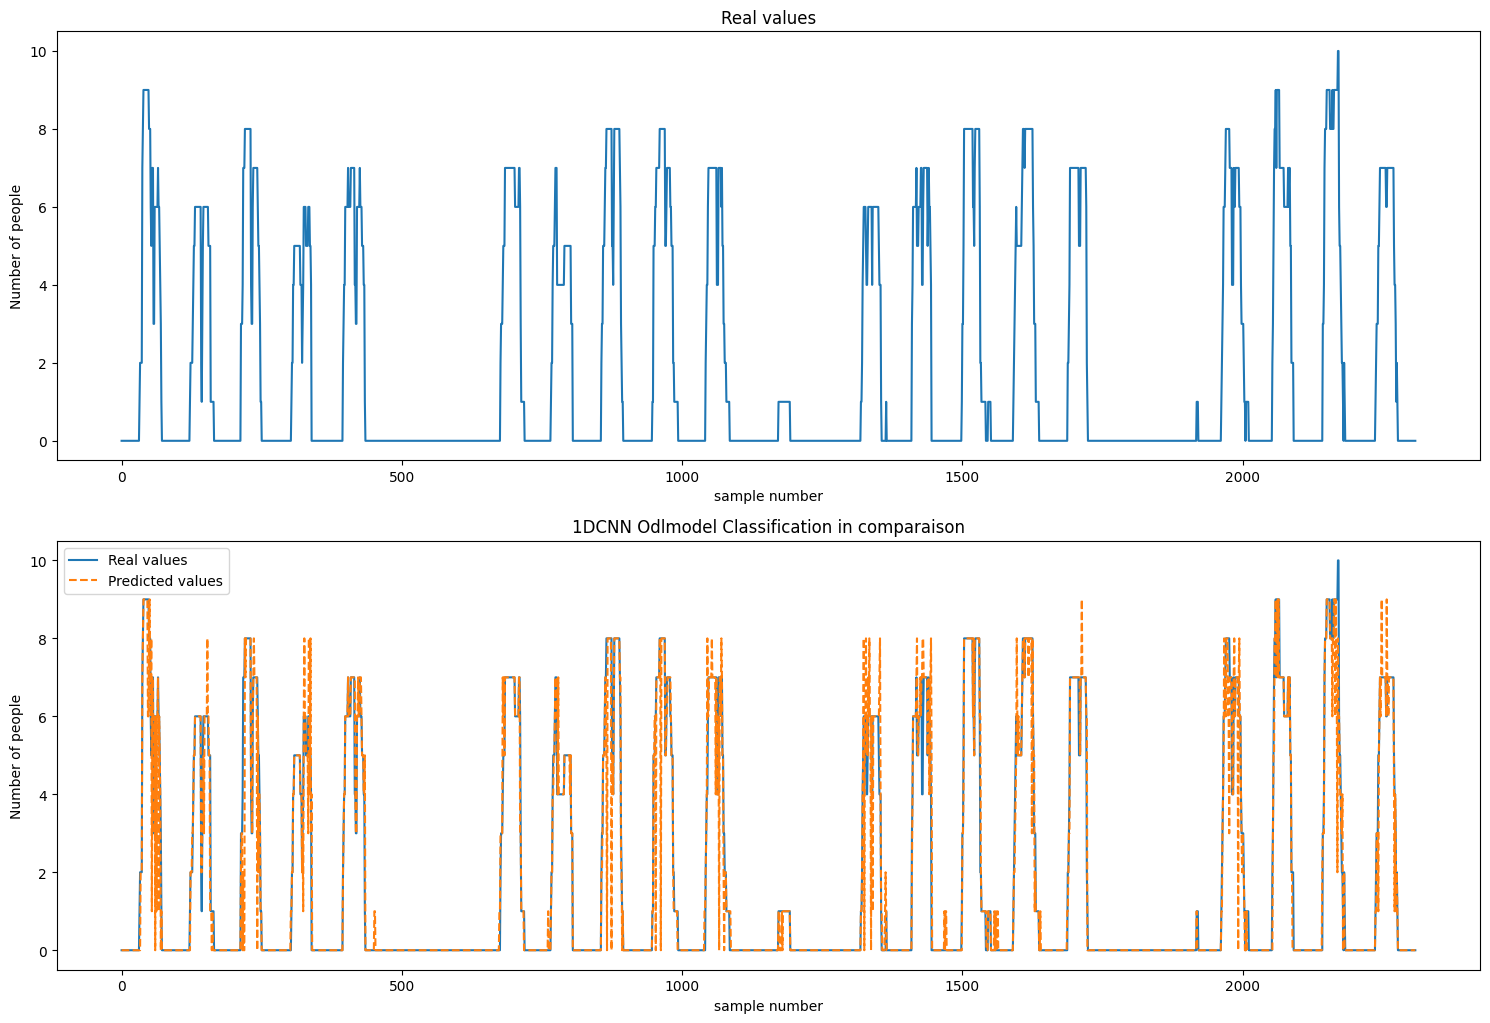

In [265]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(y_validation_cat)
plt.title('Real values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(3, 1, 2)
sns.lineplot(data=y_validation_cat, label='Real values')
sns.lineplot(data=y_pred_CNN_depth_cat, label='Predicted values',linestyle='--')
plt.title('1DCNN Odlmodel Classification in comparaison')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

In [266]:
CNN_depth1024 = tf.keras.models.load_model('Models/Cla/1DCNN_deepmodel_1024.keras')

In [267]:
# # Evaluate the model
CNN_depth1024_loss, CNN_depth1024_accuracy = CNN_depth1024.evaluate(X_validation, y_validation)
print(f'Loaded model validation accuracy: {loaded_accuracy:.4f}')

y_pred_CNN_depth1024 = CNN_depth1024.predict(X_validation)
y_pred_CNN_depth1024_cat = np.argmax(y_pred_CNN_depth1024, axis=1)
y_validation_cat = np.argmax(y_validation, axis=1)

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8434 - loss: 0.8786
Loaded model validation accuracy: 0.9138
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


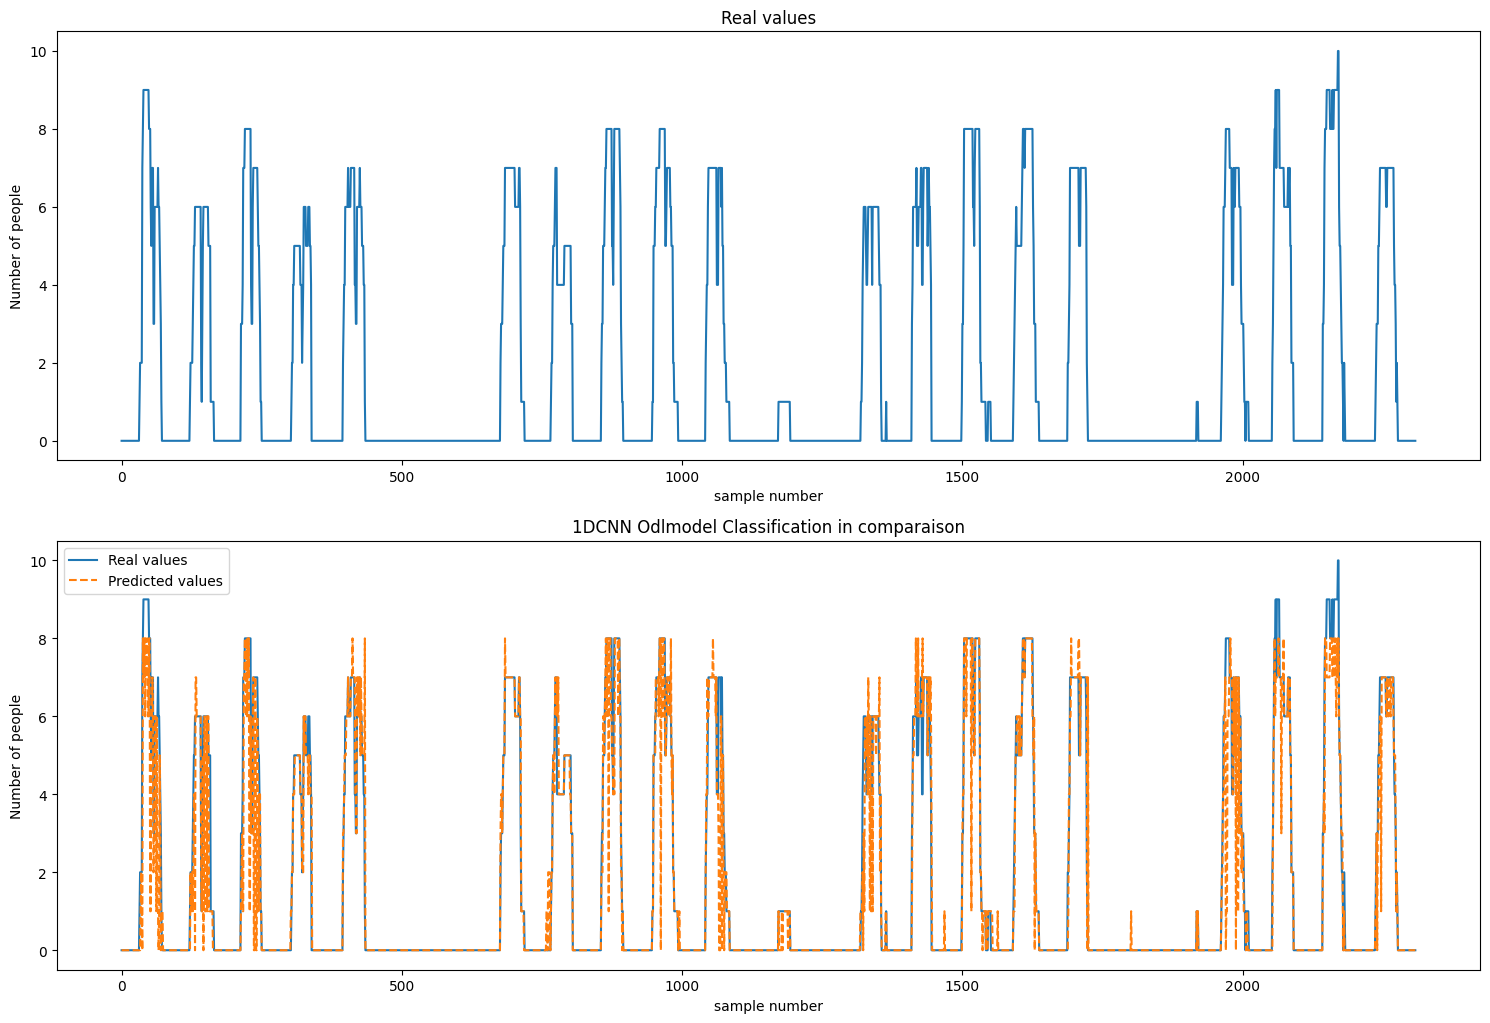

In [268]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(y_validation_cat)
plt.title('Real values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(3, 1, 2)
sns.lineplot(data=y_validation_cat, label='Real values')
sns.lineplot(data=y_pred_CNN_depth1024_cat, label='Predicted values',linestyle='--')
plt.title('1DCNN Odlmodel Classification in comparaison')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

In [269]:
CNN_depth1024_2500 = tf.keras.models.load_model('Models/Cla/1DCNN_deepmodel_1024_2500epoch.keras')

In [270]:
# # Evaluate the model
CNN_depth1024_2500_loss, CNN_depth1024_2500_accuracy = CNN_depth1024_2500.evaluate(X_validation, y_validation)
print(f'Loaded model validation accuracy: {loaded_accuracy:.4f}')

y_pred_CNN_depth1024_2500 = CNN_depth1024_2500.predict(X_validation)
y_pred_CNN_depth1024_2500_cat = np.argmax(y_pred_CNN_depth1024_2500, axis=1)
y_validation_cat = np.argmax(y_validation, axis=1)

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8448 - loss: 0.7334
Loaded model validation accuracy: 0.9138
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


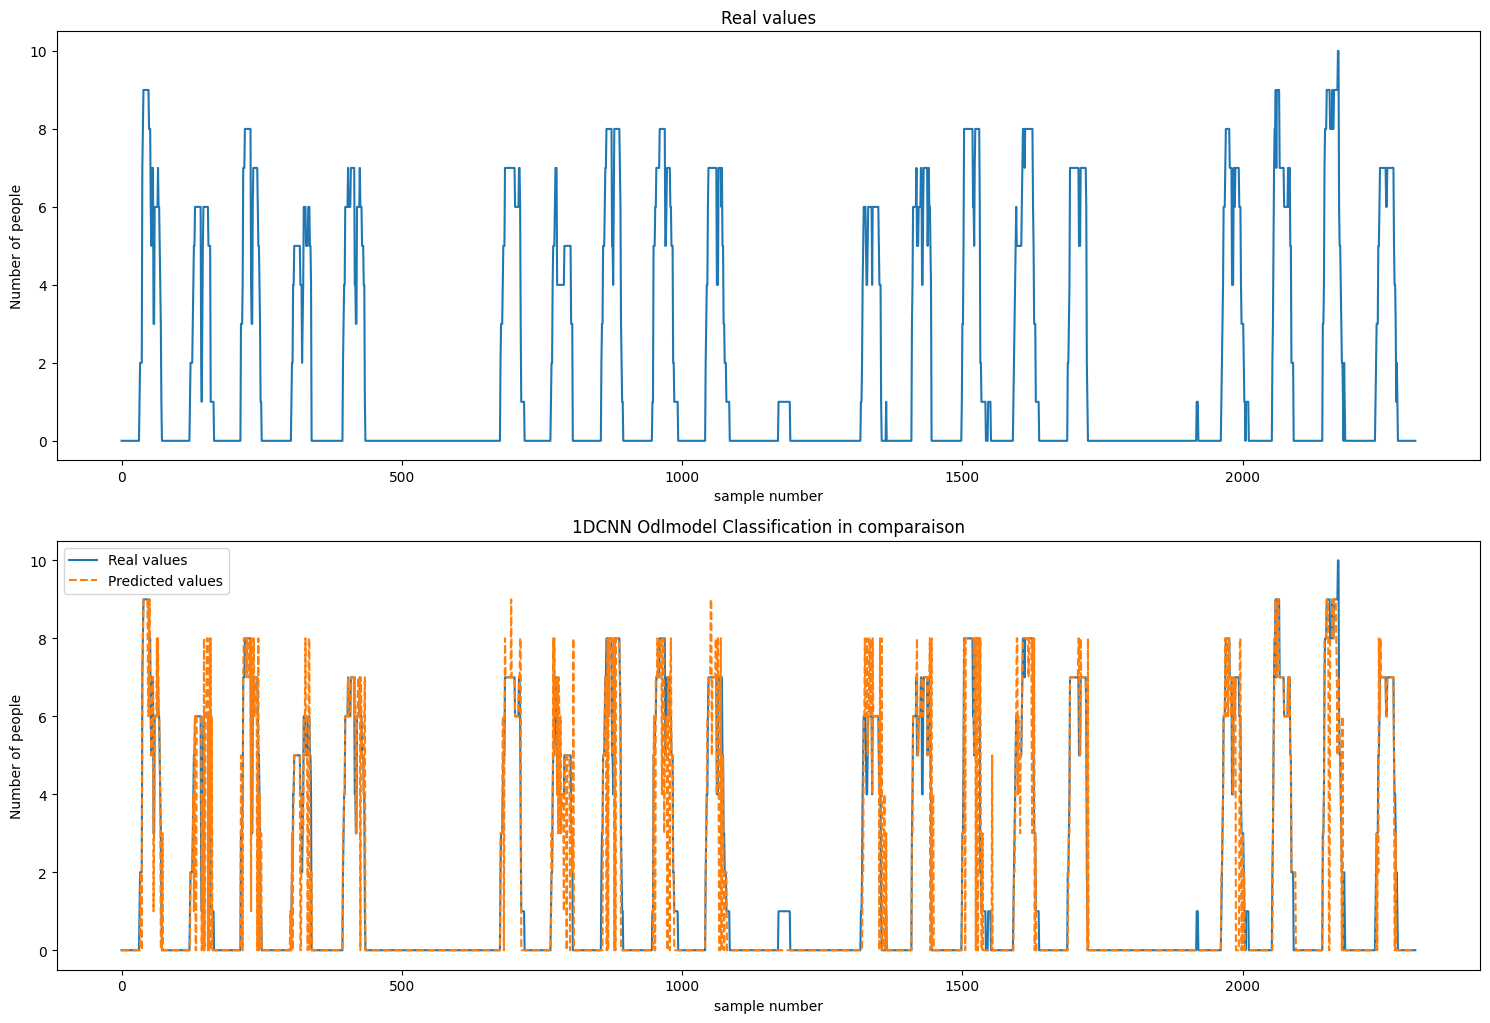

In [271]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(y_validation_cat)
plt.title('Real values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(3, 1, 2)
sns.lineplot(data=y_validation_cat, label='Real values')
sns.lineplot(data=y_pred_CNN_depth1024_2500_cat, label='Predicted values',linestyle='--')
plt.title('1DCNN Odlmodel Classification in comparaison')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

# Compilation of the predictions
Using the same type of data

In [360]:
data_date = pd.read_csv('Organized_Data.csv')

# Handle missing values by dropping them
data_date = data_date.dropna()

data_date= data_date[360:].reset_index(drop=True)

date_series = data_date['Datetime']

split_index = int(len(data_date) * 1)
# X_validation = X[-split_index:]
date_series_validation = date_series[-split_index:]

In [361]:
date_series_validation = date_series_validation.apply(lambda x: f"{x}"+"0" if len(x) <= 15 else x)

datetime_objects = [datetime.strptime(date_str, '%d.%m.%Y %H:%M') for date_str in date_series_validation]

In [362]:
basic_regression = CNNregModel.predict(X_validation)
# y_pred_Newmodel_cat
# y_pred_CNN_depth_cat
# y_pred_CNN_depth1024_cat
# y_pred_CNN_depth1024_2500_cat

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [363]:
basic_regression = []
for x in CNNregModel_predictions:
    y = x[0]
    basic_regression.append(y)
print(basic_regression)

[0.009197921, 0.00944832, 0.00944832, 0.00944832, 0.00944832, 0.00944832, 0.009447515, 0.009447515, 0.009447515, 0.009447515, 0.009460032, 0.009460032, 0.009451836, 0.009598464, 0.009444624, 0.009598464, 0.009451836, 0.009594113, 0.009451836, 0.009594113, 0.009444624, 0.009594113, 0.00944832, 0.009598523, 0.009598523, 0.009598523, 0.009598523, 0.009451836, 0.009451836, 0.009451836, 0.009444624, 0.009455264, 0.009659916, 1.9778366, 1.9663005, 1.9701426, 1.9747062, 7.02618, 8.034165, 8.933485, 9.2614975, 9.188154, 9.371604, 9.3024645, 9.069545, 9.189133, 9.158977, 9.284064, 9.362839, 8.14059, 8.039194, 8.058457, 6.1552815, 5.0538044, 6.9923697, 6.993503, 7.0043645, 2.847599, 2.774364, 6.1386456, 5.9782753, 5.9513392, 6.2765813, 6.2960906, 6.785335, 7.0093985, 5.906733, 5.8280277, 4.9410834, 3.936987, 2.9534535, 1.0315716, 0.009255648, 0.009444028, 0.009377867, 0.009625584, 0.009919822, 0.009708047, 0.0099033415, 0.009800166, 0.009841502, 0.009132296, 0.008701861, 0.009373963, 0.009310663

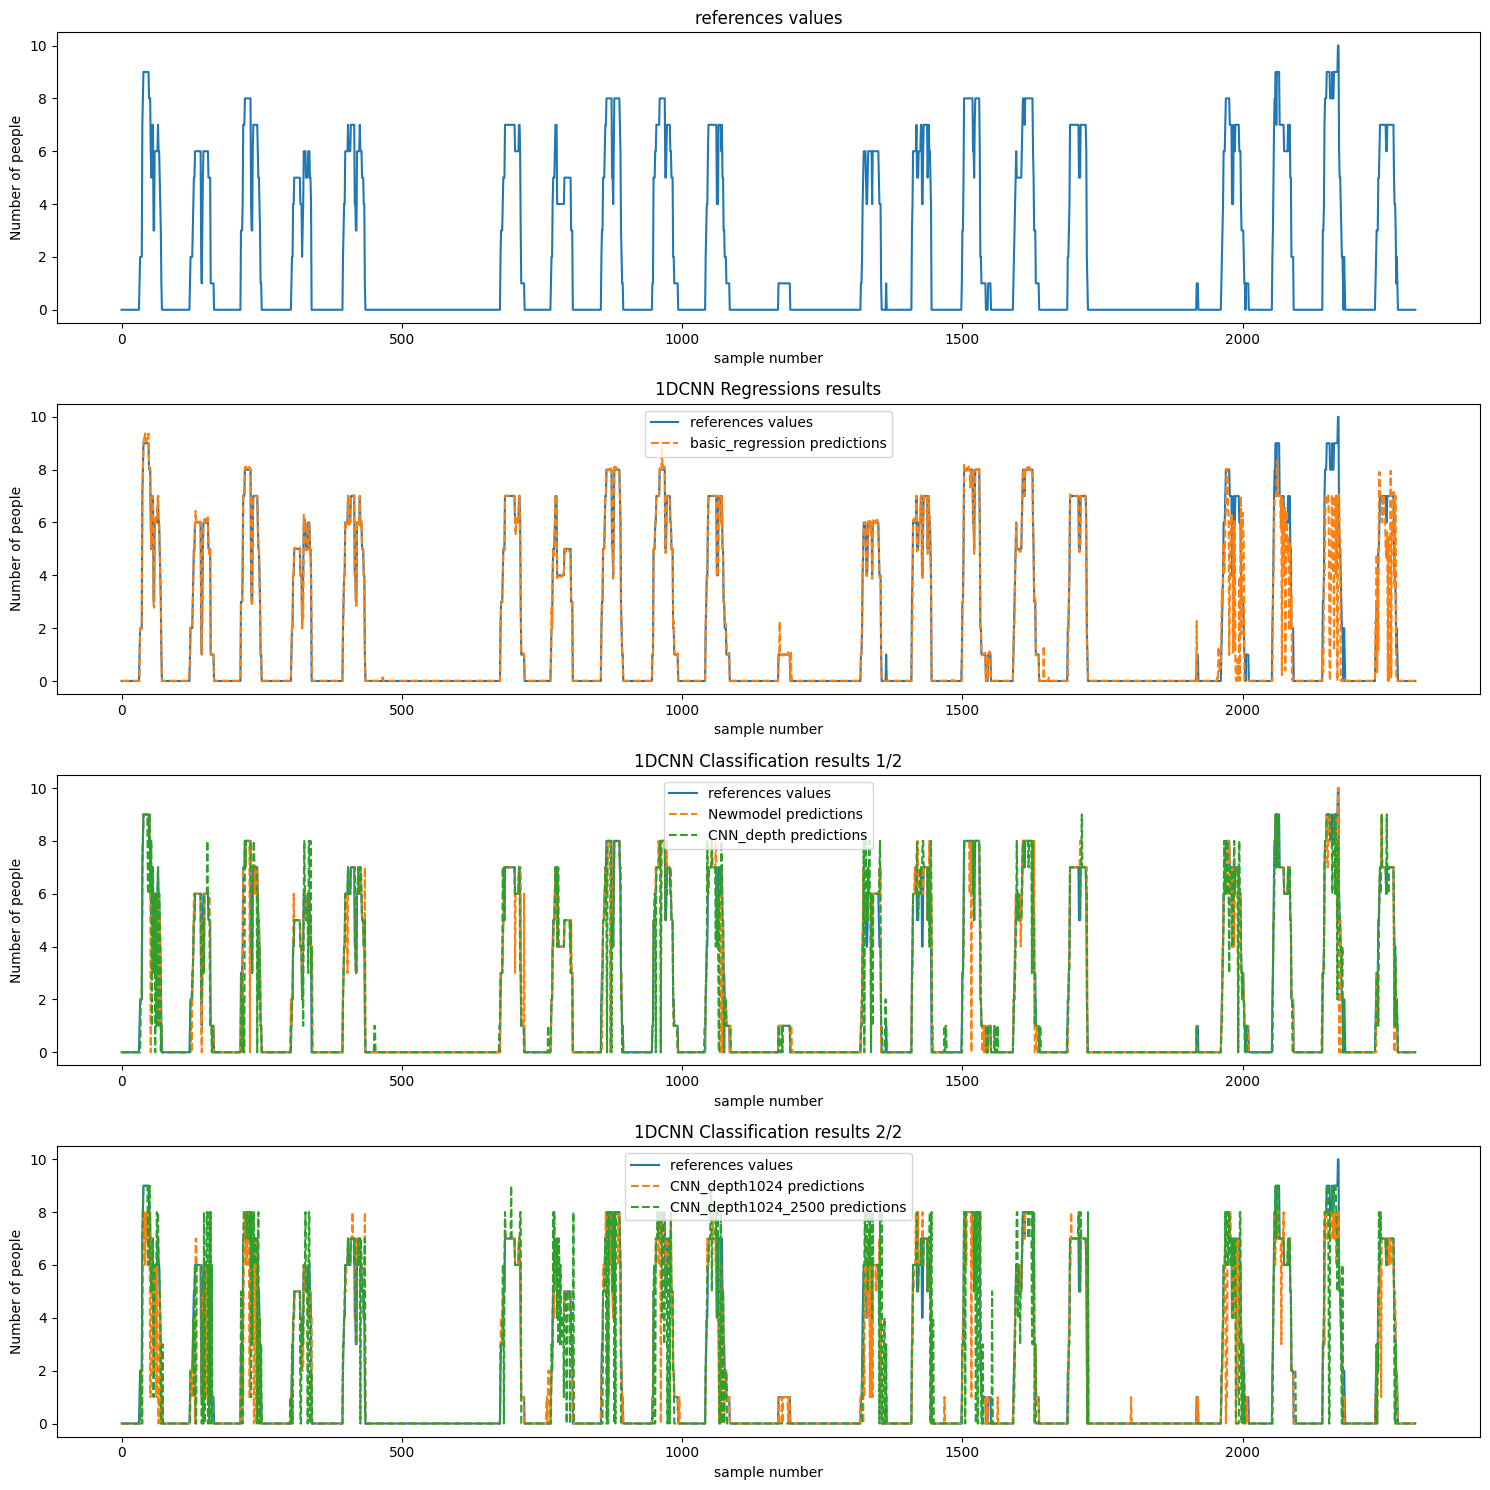

In [364]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(4, 1, 1)
plt.plot(y_validation_cat)
plt.title('references values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(4, 1, 2)
sns.lineplot(data=y_validation_cat, label='references values')
sns.lineplot(data=basic_regression, label='basic_regression predictions',linestyle='--')
plt.title('1DCNN Regressions results')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

"""" y_pred_Odlmodel_cat,y_pred_Newmodel_cat,y_pred_CNN_depth_cat,y_pred_CNN_depth1024_cat,y_pred_CNN_depth1024_2500_cat """

plt.subplot(4, 1, 3)
sns.lineplot(data=y_validation_cat, label='references values')
sns.lineplot(data=y_pred_Newmodel_cat, label='Newmodel predictions',linestyle='--')
sns.lineplot(data=y_pred_CNN_depth_cat, label='CNN_depth predictions',linestyle='--')
plt.title('1DCNN Classification results 1/2')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.subplot(4, 1, 4)
sns.lineplot(data=y_validation_cat, label='references values')
sns.lineplot(data=y_pred_CNN_depth1024_cat, label='CNN_depth1024 predictions',linestyle='--')
sns.lineplot(data=y_pred_CNN_depth1024_2500_cat, label='CNN_depth1024_2500 predictions',linestyle='--')
plt.title('1DCNN Classification results 2/2')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

## Calulating the F1 and accuracy score

In [365]:
accuracy = accuracy_score(y_validation_cat, y_pred_Newmodel_cat)
f1 = f1_score(y_validation_cat, y_pred_Newmodel_cat, average='macro')

print('Newmodel metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Newmodel metrics:
Accuracy: 0.9138155045474231
F1 Score: 0.8084285328767468


In [366]:
ypred = y_pred_CNN_depth_cat
accuracy = accuracy_score(y_validation_cat, ypred)
f1 = f1_score(y_validation_cat, ypred, average='macro')

print('CNN_depth metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

CNN_depth metrics:
Accuracy: 0.9099177132957991
F1 Score: 0.7088521525308565


In [367]:
ypred = y_pred_CNN_depth1024_cat
accuracy = accuracy_score(y_validation_cat, ypred)
f1 = f1_score(y_validation_cat, ypred, average='macro')

print('CNN_depth1024 metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

CNN_depth1024 metrics:
Accuracy: 0.8657427457773929
F1 Score: 0.5551367399540298


In [368]:
ypred = y_pred_CNN_depth1024_2500_cat
accuracy = accuracy_score(y_validation_cat, ypred)
f1 = f1_score(y_validation_cat, ypred, average='macro')

print('CNN_depth1024_2500 metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

CNN_depth1024_2500 metrics:
Accuracy: 0.8488523170203551
F1 Score: 0.5607461787309368


## Calculating the regression metrics

In [369]:
y_reg_validation = newdata['nb_persons_SH']

In [370]:
# Calculate additional metrics
mae = mean_absolute_error(y_reg_validation, basic_regression)
mse = mean_squared_error(y_reg_validation, basic_regression)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_validation, basic_regression)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.19891827427344488
Mean Squared Error (MSE): 0.6982100579139022
Root Mean Squared Error (RMSE): 0.8355896468446113
R-squared (R2): 0.9157173906173594


## Creating the output file

In [371]:
# Transpose the data (convert columns to rows)
rows = list(zip(datetime_objects, y_validation_cat, y_pred_Odlmodel_cat,y_pred_Newmodel_cat,y_pred_CNN_depth_cat,y_pred_CNN_depth1024_cat,y_pred_CNN_depth1024_2500_cat,basic_regression))

In [372]:
# Open a file for writing (create 'output.csv')
header = ['Datetime', 'Real values','Small 1DCNN Classification Old model predictions','Small 1DCNN Classification New model predictions','Deep 1DCNN Classification model 11th layers','Deep 1DCNN Classification model 11th layers + 1024 neurones per layers','Deep 1DCNN Classification model 11th layers + 1024 neurones per layers + 2500 epoch', 'Basic Regression CNN model']
with open('outputONEmonth.csv', mode='w', newline='') as file:
    writer = csv.writer(file)

    writer.writerow(header)

    for row in rows:
        writer.writerow(row)

print("CSV file created successfully.")

CSV file created successfully.


## test on occupancy detection

In [395]:
ztrue_yes = [1 if y > 0 else 0 for y in y_validation_cat]
zpredicted_cla = [1 if y > 0 else 0 for y in y_pred_Newmodel_cat]
zpredicted_reg = [x if x < 1 else 1 for x in basic_regression]

In [396]:
accuracy = accuracy_score(ztrue_yes, zpredicted_cla)
f1 = f1_score(ztrue_yes, zpredicted_cla, average='macro')

print('Newmodel metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Newmodel metrics:
Accuracy: 0.970983109571243
F1 Score: 0.9674575362740464


In [397]:
# Calculate additional metrics
mae = mean_absolute_error(ztrue_yes, zpredicted_reg)
mse = mean_squared_error(ztrue_yes, zpredicted_reg)
rmse = np.sqrt(mse)
r2 = r2_score(ztrue_yes, zpredicted_reg)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.029035367029680736
Mean Squared Error (MSE): 0.020403496598468525
Root Mean Squared Error (RMSE): 0.1428408085893822
R-squared (R2): 0.9097836795427521
